# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values up to 2 decimal places

In [ ]:
#Seems like a great chance to see how plotly differs from seaborn
import plotly.express as px

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/foodhub_order.csv')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
Already I notice that some of the ratings are marked "Not Given", and I assume ratings are given on a 5 point scale?

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#Delineate the size of the matrix.
df.shape

(1898, 9)

#### **Observations:**
There are 1898 orders spread across 9 rows of data, **including** order_id which probably has no significance.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**
The nine rows of data have no missing entries, which is good.
Integers include the order_id, customer_id, food_prep_time, and delivery_time, which are all numeric.
(Are there duplicate customers?) (can we set up a scale of speed for both food prep and delivery, e.g. fast, appropriate, slow?)
Restaurant_names, and cuisine types are objects - need to check into how many types of cuisines, and if any overlap or are coded similarly.
The cost of the order is a float, appropriately.
The day of the week and the ratings are both objects, but perhaps should be a boolean value and categories, respectively.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#Double checking that there are no missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:**
There does not seem to be any missing values, though some values may still be NaN or inappropriate responses.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#code to give 5-number summary, transposed for easier reading
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477496.00,548.00,1476547.00,1477021.00,1477496.00,1477970.00,1478444.00
customer_id,1898.00,171168.00,113698.00,1311.00,77788.00,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.00,7.00,4.00,12.00,14.00,22.00,35.00
food_preparation_time,1898.00,27.00,5.00,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.00,5.00,15.00,20.00,25.00,28.00,33.00


#### **Observations:**
Of the 1898 orders, the average cost is 16 dollars, though it ranges from 4 to 35 dollars.
Half of the orders are actually lower at 14 dollars.
The average time to prepare food is almost half an hour at 27 minutes, though it may range from 20 to 35 minutes, a difference of only fifteen minutes.
Delivery times averages just less at 24 minutes, ranging from 15 to 33 minutes, a three minute longer range.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#code to count number of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#code to count percentage of ratings
df['rating'].value_counts(normalize=True)

Not given   0.39
5           0.31
4           0.20
3           0.10
Name: rating, dtype: float64

#### **Observations:**
736 orders (39%) have ratings that are 'not given'. This is a significant portion and needs to be considered. It is interesting that the lowest rating is a 3, and this includes only 10% of the orders; can some of the 'not given' ratings reflect people who did not want to give poor ratings?

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Question 6: Customer ID

In [ ]:
#how many unique customers are in the dataframe?
df['customer_id'].nunique()

1200

In [ ]:
#which customers order repeatedly and how many times?
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

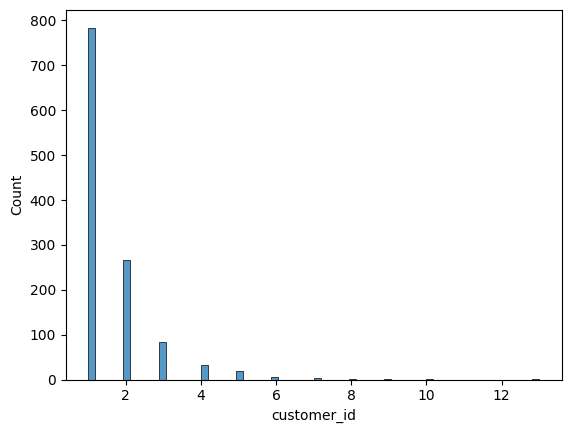

In [ ]:
#a graph gives the frequency of repeated orders
sns.histplot(df['customer_id'].value_counts());

In [ ]:
#plotly allows more exploration into exactly how many customers are ordering frequently
his=px.histogram(df, x=(df['customer_id'].value_counts()))
his.show()

**Observations:** About the Customer ID:
There are 1200 unique customers, with almost 800 placing only one order. However, there are 267 customers ordering twice, and 83 placing three orders. The four customers who order the most frequently have placed 8, 9, 10, and 13 orders.

##### Question 6: Number of restaurants and types of cuisine

In [ ]:
#number of unique restaurants
df['restaurant_name'].nunique()

178

In [ ]:
#number of types of cuisine
df.groupby(['cuisine_type'])['cuisine_type'].value_counts()

cuisine_type    cuisine_type  
American        American          584
Chinese         Chinese           215
French          French             18
Indian          Indian             73
Italian         Italian           298
Japanese        Japanese          470
Korean          Korean             13
Mediterranean   Mediterranean      46
Mexican         Mexican            77
Middle Eastern  Middle Eastern     49
Southern        Southern           17
Spanish         Spanish            12
Thai            Thai               19
Vietnamese      Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
#number of types of cuisine
df.groupby(['cuisine_type'])['restaurant_name'].value_counts()

cuisine_type  restaurant_name            
American      Shake Shack                    219
              Blue Ribbon Fried Chicken       96
              Five Guys Burgers and Fries     29
              Bareburger                      27
              The Meatball Shop               20
                                            ... 
Thai          Rohm Thai                        1
              Spice Thai                       1
Vietnamese    V-Nam Cafe                       4
              Xe May Sandwich Shop             2
              Nha Trang One                    1
Name: restaurant_name, Length: 179, dtype: int64

In [ ]:
his=px.histogram(df, x='cuisine_type', y= (df.groupby(['cuisine_type']).value_counts()), color='restaurant_name')
his.show()

**Observations:** About the restaurants and cuisines available: There are fourteen types of cuisine available from 178 different restaurants. The most popular restaurants serve American (more than 575 orders), Japanese (more than 450 orders) and Italian (almost 300 orders). Chinese comes in fourth with over 200 orders and no other cuisine gets more than 80 orders.

##### Question 6: Cost of the Order

In [ ]:
#distribution of the number of orders and the general cost of the order
sns.histplot(data=df, x='cost_of_the_order',binwidth=1,kde=True);

In [ ]:
#establish the quartiles and outliers for money spent per order
sns.boxplot(data=df, x='cost_of_the_order');

**Observations:** About the cost of the order:
More than 300 orders are around twelve dollars, with 50% of the orders ranging between 12 and 23 dollars. Half of the orders are under 14 dollars, in a slightly right skewed graph. Interestingly, there seem to be few orders between 26 and 29 dollars, and no orders less than 4, or more than 35 dollars.

##### Question 6: Food Preparation Time

In [ ]:
#distribution of the number of orders and how long each order took
sns.histplot(data=df, x='food_preparation_time',kde=True);

In [ ]:
#establish the quartiles and outliers for length of time to prepare each order
sns.boxplot(data=df, x='food_preparation_time');

**Observations:** About the food preparation time:
In general, 50% of the food orders take between 23 and 31 minutes. The graph is almost evenly skewed, with the median right at 27 minutes.
Interestingly, the histogram shows four spikes, at 20, 26, 30 and 34 minutes, with the remaining times evenly split at around 110 orders apiece. Perhaps those four time intervals relate to specific food cooking times (e.g. chicken must be cooked x number of minutes?)

##### Question 6: Food Delivery Time

In [ ]:
#distribution of the number of orders and the general time for each delivery
sns.histplot(data=df, x='delivery_time',kde=True);

In [ ]:
#establish the quartiles and outliers for length of time to deliver each order
sns.boxplot(data=df, x='delivery_time');

**Observations:** About the food delivery time:
The data is slightly left skewed, with two modes of almost three hundred orders taking 25 and 28 minutes. The median length of time for an order was 25 minutes, though fifty percent of the orders took between 20 and 28 minutes. The most time for delivery was almost 33 minutes, while the minimum was 15 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# look at relationship between restaurants and number of orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
#explore the connection between cuisines, number of orders, and the individual restaurants
his=px.histogram(df, x='restaurant_name', y= (df.groupby(['restaurant_name']).value_counts()), color='cuisine_type')
his.update_yaxes(title_text="Number of orders")
his.show()

**Observations:** About the top five restaurants:
The top five restaurants are Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders. There are actually only seven restaurants with more than fifty orders a piece, and only 21 restaurants with more than 20 orders a piece. Of the 178 restaurants, the top 5 restaurants account for one third of the orders placed.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

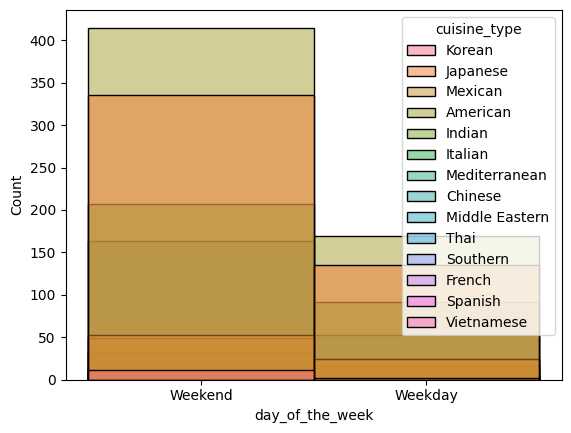

In [ ]:
#number of orders and types of cuisines in general
sns.histplot(data=df, x='day_of_the_week',hue='cuisine_type');

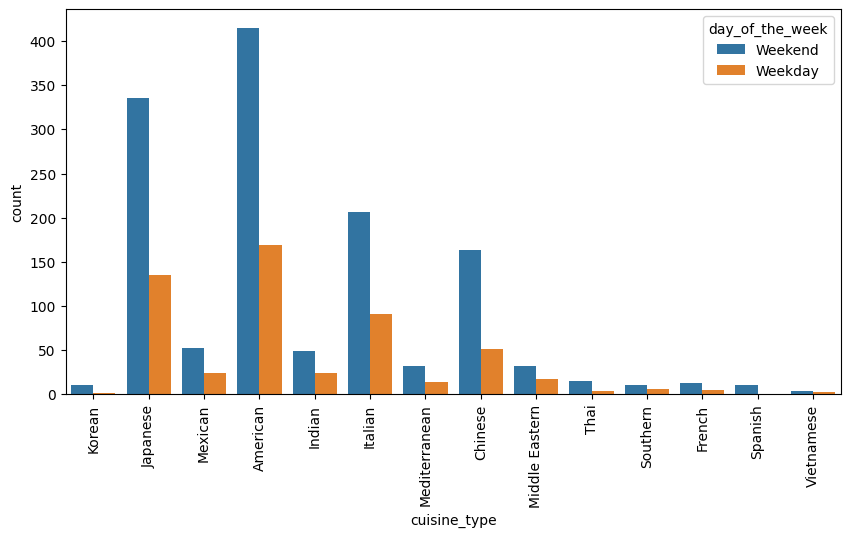

In [ ]:
#number of orders and cuisine_type by day of the week
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');

In [ ]:
#number of orders and cuisine_type by day of the week
his=px.histogram(df, x='cuisine_type', y= (df.groupby(['restaurant_name']).value_counts()), color='day_of_the_week')
his.update_yaxes(title_text="Number of orders")
his.show()

In [ ]:
#sorting number of orders by day of the week, then type of cuisine
popular_cuisine=df.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False)
popular_cuisine

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

**Observations:** About the most popular cuisine on weekends:
American cuisine is easily the most popular cuisine type with over 400 orders on the weekend, followed by Japanese with almost 350 orders, and much further behind, Italian cuisine with just over two hundred orders. The same hierachy dominates weekdays as well, but with less than half of the same number of orders.  

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

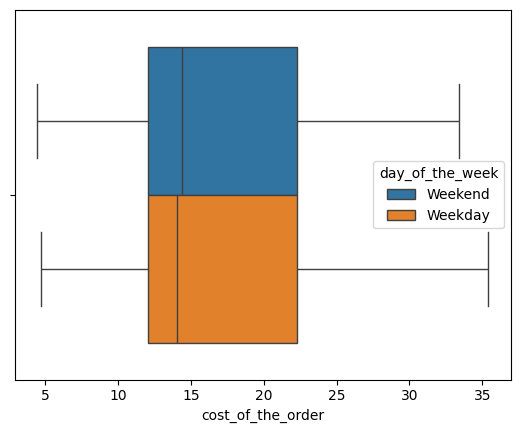

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order', hue='day_of_the_week');

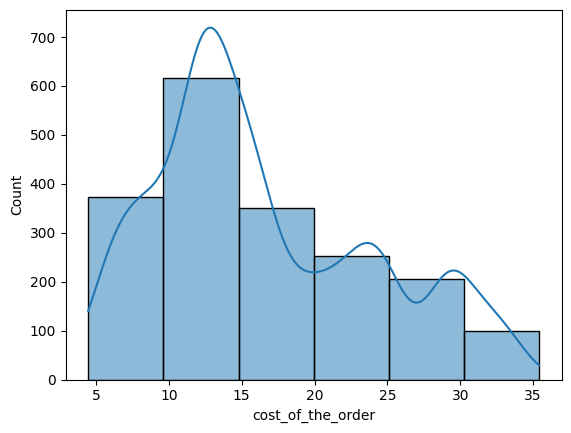

In [ ]:
sns.histplot(data=df, x="cost_of_the_order",bins=6,kde=True);


In [ ]:
#number of orders over $20 divided by total number of orders to get percentage
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]

0.2924130663856691

**Observations:** About orders placed over 20 dollars:



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#the mean, or average delivery time
print(f'The average delivery time is',round(df['delivery_time'].mean()),'minutes.')

The average delivery time is 24 minutes.


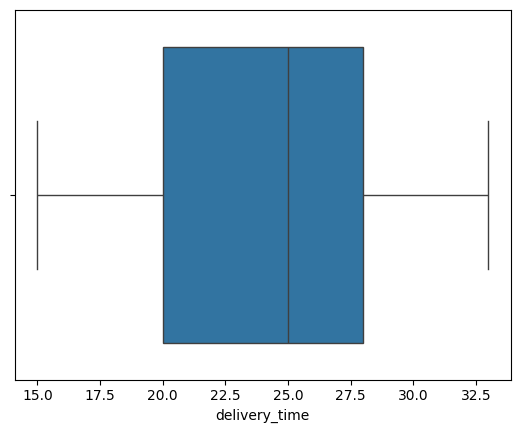

In [ ]:
#In a normal distribution, the median is usually close to the mean; the median here is 25 minutes.
sns.boxplot(data=df, x='delivery_time');

**Observations: **About the mean delivery time:



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
cust_freq = df['customer_id'].value_counts(ascending=False)
print(cust_freq.head(15))

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
Name: customer_id, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#code to count number of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#Create a group with only restaurant names and ratings
promo_group = df.loc[:,['restaurant_name','order_id','rating']].copy();
print(promo_group)

                            restaurant_name  order_id     rating
0                                   Hangawi   1477147  Not given
1                 Blue Ribbon Sushi Izakaya   1477685  Not given
2                               Cafe Habana   1477070          5
3                 Blue Ribbon Fried Chicken   1477334          3
4                          Dirty Bird to Go   1478249          4
...                                     ...       ...        ...
1893  Chipotle Mexican Grill $1.99 Delivery   1476701          5
1894                              The Smile   1477421          5
1895                      Blue Ribbon Sushi   1477819  Not given
1896                      Jack's Wife Freda   1477513          5
1897                      Blue Ribbon Sushi   1478056  Not given

[1898 rows x 3 columns]


In [ ]:
#change 'Not given' str to Nan
promo_group['rating'] = promo_group['rating'].replace(['Not given'],np.nan)
print(promo_group)

                            restaurant_name  order_id rating
0                                   Hangawi   1477147    NaN
1                 Blue Ribbon Sushi Izakaya   1477685    NaN
2                               Cafe Habana   1477070      5
3                 Blue Ribbon Fried Chicken   1477334      3
4                          Dirty Bird to Go   1478249      4
...                                     ...       ...    ...
1893  Chipotle Mexican Grill $1.99 Delivery   1476701      5
1894                              The Smile   1477421      5
1895                      Blue Ribbon Sushi   1477819    NaN
1896                      Jack's Wife Freda   1477513      5
1897                      Blue Ribbon Sushi   1478056    NaN

[1898 rows x 3 columns]


In [ ]:
#check for empty cells; those will get dropped for this question
promo_group.isnull().sum()
#promo_group.info()

restaurant_name      0
order_id             0
rating             736
dtype: int64

In [ ]:
#all rows with no rating have been dropped; notice we went from 1898 rows, to 1162, or 736 fewer.
promo_group.dropna(subset=['rating']).reset_index(inplace=False)
promo_group.tail()

,restaurant_name,order_id,rating
1893,Chipotle Mexican Grill $1.99 Delivery,1476701,5.00
1894,The Smile,1477421,5.00
1895,Blue Ribbon Sushi,1477819,NaN
1896,Jack's Wife Freda,1477513,5.00
1897,Blue Ribbon Sushi,1478056,NaN


In [ ]:
#change the 'rating' column type to a float
promo_group['rating']=promo_group['rating'].astype(float)
promo_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1898 non-null   object 
 1   order_id         1898 non-null   int64  
 2   rating           1162 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.6+ KB


In [ ]:
#Here is the number of ratings each (178) restaurant has:
r_cnt = promo_group.groupby(['restaurant_name'])['rating'].nunique()
print(r_cnt)
r_cnt.max()
r_cnt.value_counts()

restaurant_name
'wichcraft          1
12 Chairs           2
5 Napkin Burger     2
67 Burger           1
Alidoro             0
                   ..
Zero Otto Nove      1
brgr                1
da Umberto          1
ilili Restaurant    3
indikitch           2
Name: rating, Length: 178, dtype: int64


1    74
3    43
2    39
0    22
Name: rating, dtype: int64

In [ ]:
promo_group.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Market Table                   0
Paul & Jimmy's                 0
Room Service                   0
Rohm Thai                      0
Lamarca Pasta                  0
Name: rating, Length: 178, dtype: int64

In [ ]:
#Here is the list of 178 restaurants with their average rating:
avg_r = promo_group.groupby(['restaurant_name'])['rating'].mean()
print(avg_r)
avg_r.min()
avg_r.value_counts()

restaurant_name
'wichcraft         5.00
12 Chairs          4.50
5 Napkin Burger    4.00
67 Burger          5.00
Alidoro             NaN
                   ... 
Zero Otto Nove     4.00
brgr               3.00
da Umberto         5.00
ilili Restaurant   4.15
indikitch          4.50
Name: rating, Length: 178, dtype: float64


5.00    47
4.00    29
4.50    10
3.00     8
4.67     7
3.50     5
4.33     5
4.25     3
4.71     2
4.42     2
4.56     2
4.27     2
4.15     2
4.75     2
4.20     2
4.24     1
4.62     1
4.24     1
4.36     1
4.40     1
4.70     1
4.88     1
4.51     1
3.75     1
4.28     1
3.67     1
4.12     1
4.18     1
4.36     1
4.13     1
4.30     1
4.86     1
4.35     1
4.32     1
4.43     1
4.60     1
3.25     1
4.59     1
4.22     1
4.33     1
3.33     1
4.06     1
4.29     1
Name: rating, dtype: int64

In [ ]:
#find number of restaurants with ratings averaging above  (see q 7 for the 6 restaurants that have more than 50 orders)

In [ ]:
#aggregation method of finding both rating average and number of ratings for each restaurant
selected=promo_group.groupby(promo_group['restaurant_name'])['rating'].agg(['mean','count'])
selected[selected['count']>50].sort_values(by='count',ascending=False)

,mean,count
restaurant_name,,
Shake Shack,4.28,133
The Meatball Shop,4.51,84
Blue Ribbon Sushi,4.22,73
Blue Ribbon Fried Chicken,4.33,64


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
total_time=[['food_preparation_time'])['delivery_time'].sum()))]
total_time

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-153-1e26f68b34fb>, line 1)

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---